 # Tutorial Data Handling
 # Table of Contents
 1. [Introduction](#introduction)
 2. [Data Input and Output](#data)
 3. [Descriptive Statistics](#descriptive)
 4. [Plotting](#plot)
 5. [Queries](#filter)
 6. [Mutations](#small)
 7. [Appendix](#documentation)




   

# TODO
6. Pull request an Arnau Valladares-Esteban schicken

<a id="introduction"></a> 
 # Introduction
This tutorial covers the topic of **Basics of Data Handling**. We will give an overview of how to get, prepare, and illustrate your data in such a way that you can go on and perform statistical analysis. <br />
The importance of Data Handling has numerous arguments, however one striking argument is that your data handling is the base for all further operations you will perform on your data. Meaning, if your base is not correctly build-up all further operations are doomed to be hazardous to your objective of performing a sound analysis on your data.
Therefore it makes sense to actively confront oneself with the in's and out's of data handling. Additionally, as it is a recurring work the time gains achieved when improving your data handling can be quite substantial.

In [106]:
# Installing all the Packages we use later
using Pkg
Pkg.add("DataFrames")
Pkg.add("VegaDatasets")
Pkg.add("VegaLite")
Pkg.add("FileIO")
Pkg.add("CSVFiles")
Pkg.add("ExcelFiles")
Pkg.add("Query")
Pkg.add("StatsKit")
Pkg.add("JSON")
Pkg.add("Dates")

 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]
 Res

<a id="data"></a>
# Data Input and Output
To do any data related task we first have to get the data into the Julia environment. In this section we cover some of the options currently available.
First, we can enter the data manually into Julia. As we will later work with the classical Iris dataset we show how we could enter at least part of that data manually. First, we create an empty Data Frame with the correct structure and column types. Then with the **vcat()** function we add one entry into this data frame.

In [107]:
using(DataFrames)
# Create an empty DataFrame 
df = DataFrame(petalLength=Float64[], 
    sepalWidth=Float64[], 
    sepalLength=Float64[], 
    petalWidth=Float64[], 
    species=String[])
# Add one entry to the DataFrame
df = vcat(df, DataFrame(petalLength=1.4, sepalWidth = 3.5, sepalLength =5.1, petalWidth = 0.2, species ="setosa"))

,petalLength,sepalWidth,sepalLength,petalWidth,species
,Float64,Float64,Float64,Float64,String
1,1.4,3.5,5.1,0.2,setosa


As we can see this code created a Data Frame with measurements for one iris flower. Although it would be possible to enter as many observations as we want that way this is not a good way to do it. Even if we collect data ourself we would normally prefer to enter it either in to excel or a statistical package instead of the process shown above. So as a practical advice only use the manual entry of data for parameters, other than that use import function developed for Julia.

## Data import and Export

For Data Import and Export we use the FileIO package, which is a Meta Package supporting many different file formats. The advantage is that it creates a common syntax of **load("filename")** and **save("filename", object)**.  To make the example reproduceable for everyone we use a dataset provided in the VegaDatasets package. Therefore, we also have a slightly unorthodox order.<br> We export this dataset first and show how to save it as a csv file and as an xlsx file. Then import it back to Julia to show how this can be done. In the code below, we first load the Iris Dataset then we pipe the dataset into the save function and enter the filename. Depending on the file format, additional options can be available. For example, you could specify a delimiter for the csv file but in general the standard options work well.

In [108]:
using VegaDatasets
using FileIO
using Query
iris = dataset("Iris")
iris |> save("iris.csv")
iris |> save("iris.xlsx")


Error encountered while saving "iris.xlsx".
Fatal error:


AssertionError: AssertionError: iris.xlsx already exists.

As you can see this gets quite repetitive, so we will not show how to save or load other file formats. To export data in a different file format you would have to change the file ending. Be aware that the FileIO package does not provide IO functionality for File formats but uses other packages to do that. So, for every file format you need, you must install a specific package.<br> In the case of a csv-file it is the CSV package for XLSX it is ExcelFiles.
After we created a csv-file and an xlsx-file we show how to import those. The Basic syntax is *load("filename")*. For Excel we must specify which Sheet we want to import. It is possible to restrict the imported area in the Excel file with following command *"Sheetname!Area"* as you can see in the code below. If no restriction is given the whole sheet is imported.

In [109]:
iris = DataFrame(load("iris.csv"))
irissmall = DataFrame(load("iris.xlsx", "Sheet1!A1:B4"))

,petalLength,sepalWidth
,Float64,Float64
1,1.4,3.5
2,1.4,3.0
3,1.3,3.2


If you want to import or export data to SPSS, STATA, or SAS the StatFiles package supports also those datafiles. The syntax to save and load stays the same as shown above.

## Ask for input
For some applications it might be great if we can get the user of the program to enter values into Julia. This is possible using the **readline()** function. We use a simple "program" that calculates savings to illustrate this.

In [110]:
println("How many years are you saving?")
years = parse(Int8,readline())
println("Annual interest rate (eg 0.05 corresponding to 5%)")
interest_rate = parse(Float64,readline())
println("How much do you save every month?")
monthly_amount = parse(Float64,readline())
q= (1+interest_rate)^(1/12)
amount = round(monthly_amount*q*(q^(12*years)-1)/(q-1))
println("At the end of ", years, " years you saved ", amount)

How many years are you saving?
stdin> 3
Annual interest rate (eg 0.05 corresponding to 5%)
stdin> 0.04
How much do you save every month?
stdin> 30000
At the end of 3 years you saved 1.147979e6


<a id="descriptive"></a>
# Descriptive Statistics
After importing our data, we should get a feeling for our data. <br />
A first start is to look at the descriptive statistics. Therefore, we use the package "Statskit". <br />
The package StatsKit is helpful because it is a Meta-Package that includes a lot of different packages that come in handy when calculating descriptive statistics. <br>
The first thing we want to do is to get an overview of our data. Not quantitively, but in a qualitative way. 
That means we want to see what the type of our data is, the names of our columns, and the size of the dataset that we are working with. <br />
Further we can use the function **describe()** to see if there is any data missing and/or the data types in our columns.

In [111]:
using FileIO
using Query
using VegaDatasets
using DataStructures
using StatsKit
using JSON
cars=dataset("cars")
println(typeof(iris))
println(names(iris))
println(size(iris))

DataFrame
Symbol[:petalLength, :sepalWidth, :sepalLength, :petalWidth, :species]
(150, 5)


Calculate the descriptive statistics for our different columns. As we were not entirely happy with the result that the function *describe()* gave us, we decided to write our own function **calculatemoments** that adds further descriptive statistics. The function *calculatemoments* is able to easily add or remove different statistics that we want to calculate for our dataset. By building our function *calculatemoments* we increase the flexibility of our finale data frame "Descriptive Statistics".

In [112]:
descriptive_statistics=describe(iris)
println(descriptive_statistics)
moments=[mean,var,skewness,kurtosis, minimum, maximum, median] #the kurtosis is the excess kurtosis
function calculatemoments(data,moments) 
    mymoments_array=zeros(Float64,0)
    for column in eachcol(data)
        push!(mymoments_array,moments(column[:]))
    end
    return(mymoments_array)
end
allmoments=OrderedDict()
for i in moments
    allmoments[i]=calculatemoments(iris[1:4],i)
end
dataframe_moments=DataFrame(collect(values(allmoments)))
dataframe_moments=rename!(dataframe_moments, f => t 
    for (f, t) =
       zip([:x1, :x2, :x3, :x4, :x5, :x6, :x7],     
       [:Mean, :Variance, :Skewness, :Kurtosis,:Minimum, :Maximum, :Median]))
dataframe_moments=hcat(descriptive_statistics[1:4,:1],dataframe_moments)
dataframe_moments=rename!(dataframe_moments, :x1=>:Variable)

5×8 DataFrame
│ Row │ variable    │ mean    │ min    │ median │ max       │ nunique │ nmissing │ eltype   │
│     │ Symbol      │ Union…  │ Any    │ Union… │ Any       │ Union…  │ Nothing  │ DataType │
├─────┼─────────────┼─────────┼────────┼────────┼───────────┼─────────┼──────────┼──────────┤
│ 1   │ petalLength │ 3.758   │ 1.0    │ 4.35   │ 6.9       │         │          │ Float64  │
│ 2   │ sepalWidth  │ 3.05733 │ 2.0    │ 3.0    │ 4.4       │         │          │ Float64  │
│ 3   │ sepalLength │ 5.84333 │ 4.3    │ 5.8    │ 7.9       │         │          │ Float64  │
│ 4   │ petalWidth  │ 1.19933 │ 0.1    │ 1.3    │ 2.5       │         │          │ Float64  │
│ 5   │ species     │         │ setosa │        │ virginica │ 3       │          │ String   │


,Variable,Mean,Variance,Skewness,Kurtosis,Minimum,Maximum,Median
,Symbol,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,petalLength,3.758,3.11628,-0.272128,-1.39554,1.0,6.9,4.35
2,sepalWidth,3.05733,0.189979,0.315767,0.180976,2.0,4.4,3.0
3,sepalLength,5.84333,0.685694,0.311753,-0.573568,4.3,7.9,5.8
4,petalWidth,1.19933,0.581006,-0.101934,-1.33607,0.1,2.5,1.3


<a id="plot"></a>
# Plotting


After importing a dataset and creating descriptive statistics a further useful tool to explore data are graphs. In this section of the tutorial we show how to create basic plots using the VegaLite Package. It allows to create a huge variance of typically needed plots. We can obviously not cover all of them in this tutorial but instead we will focus on plot types we think are most useful for everyone. <br>If you want to do a different plot, chances are good that you can find an example in the official documentation which can be found here. [http://fredo-dedup.github.io/VegaLite.jl/stable/]. We continue to use the Iris dataset to illustrate plotting. VegaLite is not limited to a specific data type if the data is in tabular form VegaLite can create plots out of them.

## Scatterplot
First, we show how to create a scatterplot. We start with a basic version and then show some of the fundamental additional options which are useful for most plots you create.

As can be seen in the code below we select a dataset and pipe it into the **@vplot** function. Then we define the shape which VegaLite should use to plot the data for a scatterplot this is the *:point*. If we do not specify x and y-axis all columns are plotted which leads in most cases to a useless plot. As we want to check the size of petals we specify *petalLength* and *petalWidth* as x and y-axis respectively


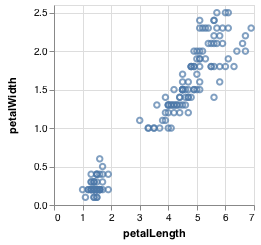

In [113]:
#Plotting petal size for the 3 different iris species
using VegaLite
iris |>
@vlplot(:point, x=:petalLength, y=:petalWidth)

With this simple code we created successfully a first version of a scatterplot. So far, we can only see that there is some relation between petal Length and petal Width. But it is possible to increase the quality of this plot. <br> We know that there exist 3 different species of iris flowers in our dataset. Therefore, it might be useful to plot those different species in different colours. This can be achieved using the colour option to which we assign the categorical column *species*. As you can see below this leads to a scatterplot where the observations for every species are plotted in a different colour. We can now clearly see a pattern for example that the Petal Size of the Iris Setosa is much smaller then of the other two species.

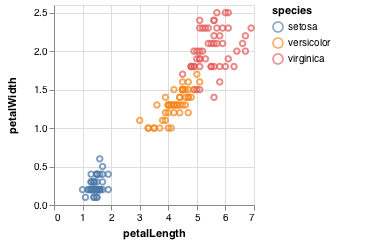

In [114]:
iris |>
@vlplot(:point, x=:petalLength, y=:petalWidth, color="species")

In a last step we show how to set a title to a graph and how to change the name of the axis because the VegaLite Standard is to use column names as axis names which is not always useful. To set a title to a plot you can just specify *title* and then assign a string to it.

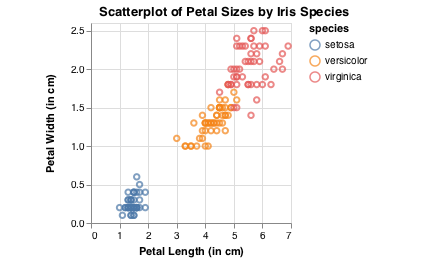

In [115]:
iris |>
@vlplot(:point,title= "Scatterplot of Petal Sizes by Iris Species", x={:petalLength, axis={title="Petal Length (in cm)"}}, y={:petalWidth, axis={title="Petal Width (in cm)"}}, color = "species")

After we created our final Scatterplot with new axis labels and a title we want to save this graph for further use. This is achieved by piping this plot to the **save** function.

In [116]:
iris |>
@vlplot(:point,title= "Scatterplot of Petal Sizes by Iris Species", x={:petalLength, axis={title="Petal Length (in cm)"}}, y={:petalWidth, axis={title="Petal Width (in cm)"}}, color = "species") |>
save("PetalScatterplot.png")

As an alternative to plotting the three species in different colours within the same plot it is also an option to plot them in 3 separate plots side by side. To do this we replace the colour keyword with the column keyword.

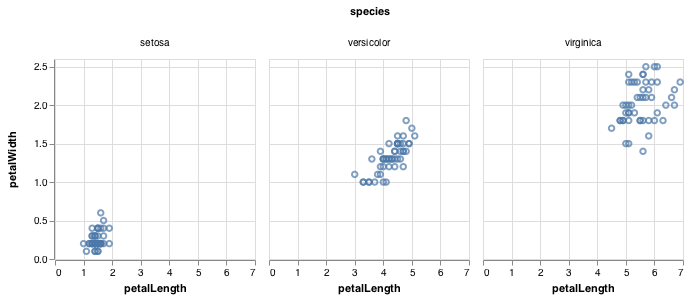

In [117]:
iris |> 
@vlplot(:point, x=:petalLength, y=:petalWidth, column=:species)

## Histogram
Next, we show you how to create a histogram of petal length in the Iris dataset. Again, we first define which dataset we want to plot. Then we select the bar shape instead of the point and set the x-axis to *petalLength*. For the y-axis we want to know how often something happens, this can be done with the **count()** function as you can see in the code below.


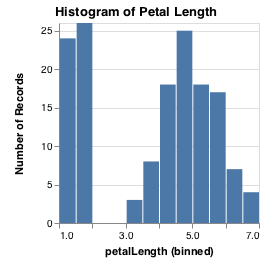

In [118]:
iris |>
@vlplot(:bar,title = "Histogram of Petal Length", x={:petalLength, bin={maxbins = 12}}, y="count()")

### Line plot

Now we show how to create a line plot. As the iris dataset does not contain anything that you usually would like to plot with a line plot we use another dataset included in the VegaDatasets. We first filter the dataset, so it only contains data for Switzerland. To create a Line plot, you define first which dataset you want to plot. Then define the shape. In this case *:line* define x-axis and y-axis as *year* and *n_life_expect* and you get a line plot.

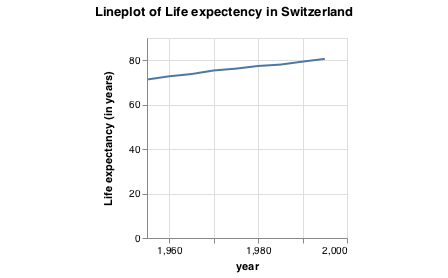

In [119]:
dataset("countries")|>
 @filter(_.country=="Switzerland") |>
@vlplot(:line, x = {:year}, y = {:n_life_expect,axis={title ="Life expectancy (in years)"}},title = "Lineplot of Life expectency in Switzerland")

## Box Plot

As a last plot we show how to make a Box Plot out of the petal length Data by *species*. As can be seen below this needs a lot more code. The reason is that this plot is build element by element. So first we need to calculate the quantiles, minimum, median and maximum. Then we can build a Boxplot step by step as you can see in the code below.

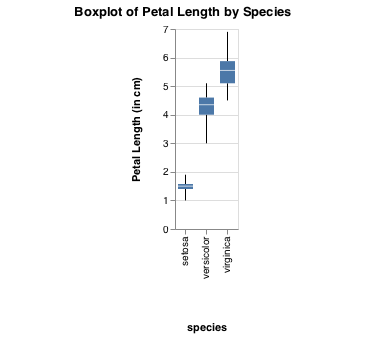

In [120]:
iris |>
@vlplot(title = "Boxplot of Petal Length by Species",
# Calculate the different Values needed to plot a Boxplot (Quartiles, Min, Max)   
    transform=[{
        aggregate=[
            {op=:q1, field=:petalLength, as=:lowerBox},
            {op=:q3, field=:petalLength, as=:upperBox},
            {op=:median, field=:petalLength, as=:midBox},
            {op=:min, field=:petalLength, as=:lowerWhisker},
            {op=:max, field=:petalLength, as=:upperWhisker}
        ],
        groupby=[:species]
    }]
) +
# Plot lower Whisker
@vlplot(
    mark={:rule, style=:boxWhisker},
    y={"lowerWhisker:q", axis={title="Petal Length (in cm)"}},
    y2="lowerBox:q",
    x="species:o"
) +
# Plot upper Whisker
@vlplot(
    mark={:rule, style=:boxWhisker},
    y="upperBox:q",
    y2="upperWhisker:q",
    x="species:o"
) +
# Plot Box
@vlplot(
    mark={:bar, style=:box},
    y="lowerBox:q",
    y2="upperBox:q",
    x="species:o",
    size={value=15}
) +
# Plot an indicator for median on the Box
@vlplot(
    mark={:tick, style=:boxMid},
    y="midBox:q",
    x="species:o",
    color={value=:white},
    size={value=15}
)

<a id="filter"></a>
# Queries
The idea is that when we look at a dataset we might want to have a look at specific characteristics and see how they are represented in our dataset. A nice package to perform such queries is called **query.jl**. <br />
The first query is a simple standalone query. It filters the dataset for some value, then maps the chosen variables, and finally orders them by one of the variables. 

In [121]:
x = iris |>
  @filter(_.sepalWidth>3.9) |>
  @map({_.species, _.sepalLength, _.sepalWidth}) |>
  @orderby_descending(_.sepalWidth) |>
  DataFrame

,species,sepalLength,sepalWidth
,String,Float64,Float64
1,setosa,5.7,4.4
2,setosa,5.5,4.2
3,setosa,5.2,4.1
4,setosa,5.8,4.0


The second query gives the exact same values. However, it first uses the **groupby** function. The groupby function comes in handy when you want to see how other variables relate to the variable you picked for your groupby function. 
In this case we group the dataset based on *sepalWidth* and then see how *sepalLength* relates to this. Further we take the mean of all the *sepalLength observations* per *sepalWidth* so that we see what the average *sepalLength* per *sepalWidth* is.
The **map** function puts this relation into a dataframe.
The **filter** function determines what values of *sepalWidth* we are looking at.
The **orderby** function orders the variables (this can be descending, ascending(default)). In a second turn one can use the **thenby** function which sorts the non-groupby variables within the overall **orderby** structure.

In [122]:
manipulated_iris = iris |>
    @groupby(_.sepalWidth) |>
    @map({sepalWidth=key(_), sepalLength_mean=mean(_.sepalLength)})|>
    @filter(_.sepalWidth > 0) |>
    @orderby_descending(_.sepalWidth) |>
    DataFrame

,sepalWidth,sepalLength_mean
,Float64,Float64
1,4.4,5.7
2,4.2,5.5
3,4.1,5.2
4,4.0,5.8
5,3.9,5.4
6,3.8,6.1
7,3.7,5.26667
8,3.6,5.425
9,3.5,5.15


With the function **groupjoin** we can take columns from different datasets and see how they match. This can be of value when we try to compare two datasets and analyse them based on similarities. <br />
The **first** argument is the outer structure (the dataset by which we group). *iris* in this case. <br />
The **second** argument is the inner structure (the dataset that gets grouped). *cars* in this case. <br />
The **third** argument specifies by which column of the outer structure we want to group. *sepalWidth* in this case. <br />
The **fourth** argument specifies which column of the inner structure is grouped. *Acceleration* in this case. <br />
The **fifth** argument takes two arguments, the column by that we group and the way how we present our match. <br />
Not surprising, the width of the sepal has no matches with the acceleration of cars. Therefore we can conclude that our groupjoin function works. 

In [123]:
groupjoined_dataset=iris |>
    @groupjoin(cars, _.sepalWidth, _.Acceleration, {Width=_.sepalWidth, Matches=count(__)}) |>
    DataFrame

,Width,Matches
,Float64,Int64
1,3.5,0
2,3.0,0
3,3.2,0
4,3.1,0
5,3.6,0
6,3.9,0
7,3.4,0
8,3.4,0
9,2.9,0


The function **join** is in its structure similar to **groupjoin**.
However, the main difference is, that we can include one additional column per dataset. Thereby the join mechanism makes it possible to compare two columns from different datasets based on a grouping mechanism with the other two columns. The example shows this clearly. 
To illustrate it is best to explain the meaning of the variables.
*ProductID*: This variable acts as our baseline. It shows the possible values that the numbers can take. 
*Price*: This is just some logical connection to *ProductID*. In this case it is just the square root. In reality it could be anything(here it must be a value). The logic behind this is: if *Product* == 1, then *Price* == something
*ProductsoldID*: This is just an array of random numbers within the range of our baseline.
*NumberProductsSold*: Again, this is just some logical connection to *ProductsoldID*. 
When we use the **join** function it matches the random numbers with the baseline. 
In a second step, both *ProductsoldID* and *ProductID* then match this with the other column within their dataset. 
Hence, we could calculate a next column that shows the revenue that was created.


In [124]:
df1= DataFrame(ProductID=[1,2,3,4,5,6], Price=[1.0,4.0,9.0,16.0,25.0,36.0])
df2= DataFrame(ProductsoldID=[rand(1:6),rand(1:6),rand(1:6),rand(1:6),rand(1:6),rand(1:6),], 
    NumberProductsSold=[1,2,3,4,5,6])
joined_dataset= df1 |>
        @join(df2, _.ProductID, _.ProductsoldID,
    {_.ProductID, _.Price,
    __.ProductsoldID, __.NumberProductsSold,})|>
        DataFrame
y=joined_dataset[:Price]
x=joined_dataset[:NumberProductsSold]
revenue=DataFrame(Revenue=joined_dataset[:Price].*joined_dataset[:NumberProductsSold])
joined_dataset=hcat(joined_dataset, revenue)
testdataset = joined_dataset

,ProductID,Price,ProductsoldID,NumberProductsSold,Revenue
,Int64,Float64,Int64,Int64,Float64
1,1,1.0,1,4,4.0
2,2,4.0,2,3,12.0
3,3,9.0,3,1,9.0
4,3,9.0,3,2,18.0
5,5,25.0,5,5,125.0
6,5,25.0,5,6,150.0


**mapmany** is a function that works similar to a multiple **filter**. In the example beneath it takes a key and then for that key it iterates over the three different variables that were inserted as an argument. Hence what we get is a column that goes through every variable named in the collection_selector for the key(s) that we defined. <br />

In [125]:
df1= DataFrame(dataset("seattle-weather"))
df = df1 |>
        @mapmany((_.temp_max,_.temp_min, _.wind) , {Key=_.date, Value=__}) |>
        DataFrame

,Key,Value
,Date,Float64
1,2012-01-01,12.8
2,2012-01-01,5.0
3,2012-01-01,4.7
4,2012-01-02,10.6
5,2012-01-02,2.8
6,2012-01-02,4.5
7,2012-01-03,11.7
8,2012-01-03,7.2
9,2012-01-03,2.3


Further commands that are useful for queries: <br />
1. take() => This takes the first n elements. For example, take(5) will take the first five elements.
2. drop() => This drops the first n elements. For example, drop(5) will drop the first five elements.
3. unique() => This gets rid of all the duplicates.
4. select() => This selects different elements from different sources and can put them together in one dataframe.
5. rename() => This renames the header of a column. 
6. mutate() => This transforms the content of a column by various commands (e.g. multiplying, adding...).



<a id="small"></a> 
# Mutations

## Missing Values

It is now time to introduce how to work with missing values. Although we would prefer to only see complete datasets without any missing values it is essential to know how to handle them if they occur. Otherwise we end up easily with annoying error messages or in the worst case with completely wrong results. Before going to code examples, we want to illustrate the problem. Let us have a look at the results of a survey about salaries.
<img src="./img/examplemissing.png">
The Table shows the salary of Anna, Fritz, and Max. For illustration purpose we assume we know the true salary of them which is shown in the second column. But Fritz refused to answer the question about his salary therefore column three to five show often used ways to encode missing values. (Na, ., -1). 
When we want to calculate mean salary, we can not get the true value of 33333.33 but typically would calculate the mean of those who answered and end up with 35000. The problem is that we currently don't handle missing values appropriately. While the error massage we get for columns three and four are just annoying we see immediately that there is a problem in our analysis. On the other hand, if we end up with a result as illustrated in the last column we are in huge trouble. Clearly, we do not want to present a mean salary of 23333. 
Therefore, if we work with a dataset generated by someone else we should have a close look at the documentation to see how missing values are encoded. This allows us to replace those by "missing", the proper type to handle missing values within Julia. As soon as we encoded the missing values properly we can use the **skipmissing** function thereby ignoring all entries with missing values which is often the standard approach to handle missing values. In the code below, we import the dataset shown in the table above. Then we show the problems with missing values and how to solve those, using the last column as an example. The code can be adapted without problem.


In [126]:
# load packages
using Statistics
# Import example Data
df = DataFrame(load(".//data//examplemissing.xlsx", "Sheet1"))
# Change the dataframe to allow it to contain missing values
allowmissing!(df)
avgsalary = mean(df[:,5])
println("This is our result if we ignore the encoding of missing values ",avgsalary)
# Recode -1 as missing 
nRows, nCols = size(df)
        for row in 1:nRows
            for col in 1:nCols
                auxValue = df[row,col]
                if auxValue == -1
                    df[row,col] = missing
                end
            end
        end
avgsalary = mean(skipmissing(df[:,5]))
println("This is our result if we encode the missing values properly ",avgsalary)

This is our result if we ignore the encoding of missing values 23333.0
This is our result if we encode the missing values properly 35000.0


## Date Problems
This section talks about problems that we may incur because of different time/date formatting of datasets. When merging such datasets or performing any tasks it might cause faulty operations due to the formatting differences. For example, imagine that we use stock data from the SMI and stock data from the NYSE. When we download this data, the distributors of the data use different date formats. When we merge the data, we are faced with the following problem: <br />
**European Format**: 10.01.2000 (Indicating January 10th) <br />
**US Format**: 10.01.2000 (Indicating October 1st) <br />
Hence for ambiguous Data (until number 12 it could be either month or day) we could face wrong categorizations. Therefore, it is crucial to pay attention to such details to ensure the validity of your data. <br />
A good approach in this case is to analyse it mechanically, meaning that you look at the dates yourself, and then, if needed, you change the type of data of both to ensure correctness. 
The package to change the type of data is most commonly **Dates.jl**. <br /> 
In the following code we use this package: <br /> 
What happens in this code is that we try to merge two different datasets, however for one dataset the date is formatted in strings. With the *Dates.DateTime* we change the type of format from string to date and then pursue to join the datasets based on the date. 
As the length of the columns for dataset *climate* and *seattle* differs we perform a *left_outer_join* command that takes the "left" dataset and matches the other dataset to it. Because of the different lengths at some point one dataset does not have any further values. The left_outer_join command fills these with *missing*.


In [127]:
using Dates
climate=DataFrame(dataset("climate"))
climate[:DATE]=Dates.DateTime.(climate[:DATE], "yyyymmdd HH:MM")
# typeof(climate[:DATE])
# climate
seattle=DataFrame(dataset("seattle-temps"))
joined_dataset = @from i in seattle begin
    @left_outer_join j in climate on i.date equals j.DATE
    @select {i.date,i.temp,j.ELEVATION}
    @collect DataFrame
end
joined_dataset

,date,temp,ELEVATION
,DateTime,Float64,Float64⍰
1,2010-01-01T00:00:00,39.4,645.3
2,2010-01-01T01:00:00,39.2,645.3
3,2010-01-01T02:00:00,39.0,645.3
4,2010-01-01T03:00:00,38.9,645.3
5,2010-01-01T04:00:00,38.8,645.3
6,2010-01-01T05:00:00,38.7,645.3
7,2010-01-01T06:00:00,38.7,645.3
8,2010-01-01T07:00:00,38.6,645.3
9,2010-01-01T08:00:00,38.7,645.3


## Change Column Types of a Dataframe
Sometimes it can be useful to change the column type in a Dataframe. For example if we want to replace data with new data which is not supported in the old datatype. If we only had integers in a column but want to enter decimal numbers to the column we need a new datatype. Another example you saw before, when we changed a string to DateTime. How to change an Integer to a Float is shown in the code below. Obviously this only works if the old datatype is compatible to the new datatype.

In [128]:
println(testdataset)
testdataset[:ProductID] = Float64.(testdataset[:ProductID])
println(testdataset)

6×5 DataFrame
│ Row │ ProductID │ Price   │ ProductsoldID │ NumberProductsSold │ Revenue │
│     │ Int64     │ Float64 │ Int64         │ Int64              │ Float64 │
├─────┼───────────┼─────────┼───────────────┼────────────────────┼─────────┤
│ 1   │ 1         │ 1.0     │ 1             │ 4                  │ 4.0     │
│ 2   │ 2         │ 4.0     │ 2             │ 3                  │ 12.0    │
│ 3   │ 3         │ 9.0     │ 3             │ 1                  │ 9.0     │
│ 4   │ 3         │ 9.0     │ 3             │ 2                  │ 18.0    │
│ 5   │ 5         │ 25.0    │ 5             │ 5                  │ 125.0   │
│ 6   │ 5         │ 25.0    │ 5             │ 6                  │ 150.0   │
6×5 DataFrame
│ Row │ ProductID │ Price   │ ProductsoldID │ NumberProductsSold │ Revenue │
│     │ Float64   │ Float64 │ Int64         │ Int64              │ Float64 │
├─────┼───────────┼─────────┼───────────────┼────────────────────┼─────────┤
│ 1   │ 1.0       │ 1.0     │ 1             │ 4 

<a id="documentation"></a> 
# Appendix 
As our short tutorial can not mention all the options of the packages we provide here links to the documentation of packages we think are important in our tutorial.<br>
DataFrame [https://juliadata.github.io/DataFrames.jl/stable/] <br>
Query [http://www.queryverse.org/Query.jl/stable/]<br>
VegaLite [http://fredo-dedup.github.io/VegaLite.jl/stable/]<br>
StatsBase[http://juliastats.github.io/StatsBase.jl/stable/]<br>
Dates[https://docs.julialang.org/en/v1/stdlib/Dates/index.html]<br>